In [71]:
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
?read_excel

read_excel {readxl},R Documentation
path,Path to the xls/xlsx file.
sheet,"Sheet to read. Either a string (the name of a sheet), or an integer (the position of the sheet). Ignored if the sheet is specified via range. If neither argument specifies the sheet, defaults to the first sheet."
range,"A cell range to read from, as described in cell-specification. Includes typical Excel ranges like ""B3:D87"", possibly including the sheet name like ""Budget!B2:G14"", and more. Interpreted strictly, even if the range forces the inclusion of leading or trailing empty rows or columns. Takes precedence over skip, n_max and sheet."
col_names,"TRUE to use the first row as column names, FALSE to get default names, or a character vector giving a name for each column. If user provides col_types as a vector, col_names can have one entry per column, i.e. have the same length as col_types, or one entry per unskipped column."
col_types,"Either NULL to guess all from the spreadsheet or a character vector containing one entry per column from these options: ""skip"", ""guess"", ""logical"", ""numeric"", ""date"", ""text"" or ""list"". If exactly one col_type is specified, it will be recycled. The content of a cell in a skipped column is never read and that column will not appear in the data frame output. A list cell loads a column as a list of length 1 vectors, which are typed using the type guessing logic from col_types = NULL, but on a cell-by-cell basis."
na,"Character vector of strings to interpret as missing values. By default, readxl treats blank cells as missing data."
trim_ws,Should leading and trailing whitespace be trimmed?
skip,"Minimum number of rows to skip before reading anything, be it column names or data. Leading empty rows are automatically skipped, so this is a lower bound. Ignored if range is given."
n_max,"Maximum number of data rows to read. Trailing empty rows are automatically skipped, so this is an upper bound on the number of rows in the returned tibble. Ignored if range is given."
guess_max,Maximum number of data rows to use for guessing column types.


In [99]:
data <- read_excel(path = "tp3.xlsx", sheet = "Feuil1")
data

Id etu,moyenne s1,moyenne s2,moyenne s3,moyenne s4,moyenne s5,moyenne s6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94


In [100]:
class("Id_etu")

[1] "character"

In [101]:
names(data) <- c("Id_etu", "s1", "s2", "s3", "s4", "s5", "s6")
data

Id_etu,s1,s2,s3,s4,s5,s6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94


In [102]:
semestres <- 2:7


In [103]:
data$prediction_s7 <- apply(data[, semestres], 1, function(x) { # applies over rows
  model <- lm(x ~ semestres, data = data.frame(semestres, x))  # lm:Régression linéaire
  predict(model, newdata = data.frame(semestres = 7))  # ax+b
})

View(data)


Id_etu,s1,s2,s3,s4,s5,s6,prediction_s7
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36,12.50190
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98,14.98952
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67,12.45810
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88,15.40143
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94,13.46905


In [107]:
# Ajouter les prévisions au dataframe
predictions <- data.frame(Id_etu = data$Id_etu, variable = "s7", value = data$prediction_s7)
data_long <- data |> 
pivot_longer(cols = c("s1","s2", "s3", "s4", "s5", "s6"), names_to = "variable", values_to = "value")
data_long

Id_etu,prediction_s7,variable,value
<chr>,<dbl>,<chr>,<dbl>
etudiant 1,12.50190,s1,10.27
etudiant 1,12.50190,s2,11.36
etudiant 1,12.50190,s3,10.69
etudiant 1,12.50190,s4,12.36
etudiant 1,12.50190,s5,11.98
etudiant 1,12.50190,s6,12.36
etudiant 2,14.98952,s1,12.24
etudiant 2,14.98952,s2,13.36
etudiant 2,14.98952,s3,13.25


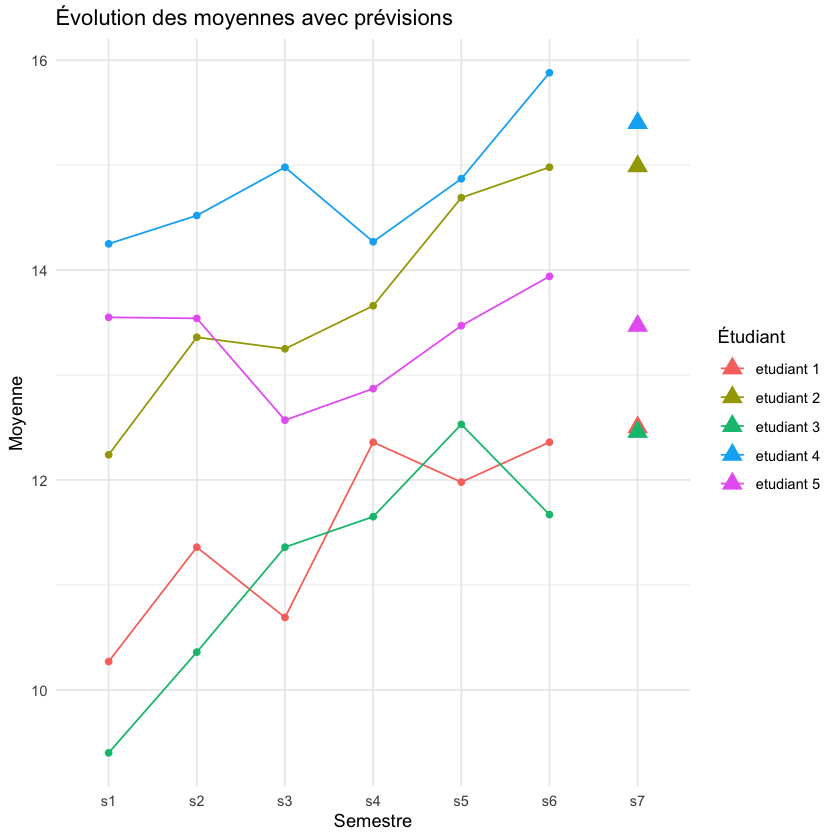

In [109]:
# Graphique
ggplot() +
  geom_line(data = data_long, aes(x = variable, y = value, group = Id_etu, color = as.factor(Id_etu))) +
  geom_point(data = data_long, aes(x = variable, y = value, color = as.factor(Id_etu))) +
  geom_point(data = predictions, aes(x = variable, y = value, color = as.factor(Id_etu)), shape = 17, size = 4) +  #  Triangle pour prévision
  theme_minimal() +
  labs(title = "Évolution des moyennes avec prévisions", x = "Semestre", y = "Moyenne", color = "Étudiant")

